## 4. Да ли је просек довољан?

До сада смо линијама представљали просечне вредности (аритметичке средине, добијене коришћењем функције `mean`), међутим, поставља се питање да ли је та просечна вредност добар репрезент нумера тог жанра или тог периода? Да ли је већина песама има карактеристике сличне просечној вредности или је просечна вредност само то - нека израчуната вредност која не мора нужно бити добар репрезент?

Да бисмо то проверили, у наставку ћемо користити **хистограме** да испитамо колико песама има разне могуће вредности музичких карактеристика, од плесозовности до енергичности, за различите временске периоде и жанрове. Почећемо као и обично учитавањем неопходних библиотека и скупа података који анализирамо:

In [1]:
# učitavanje neophodnih biblioteka:
import pandas as pd # manipulacija tabelarnim podacima
import matplotlib.pyplot as plt # vizualizacija podataka
import numpy as np # manipulacjia nizovima
import seaborn as sns # vizualizacija podataka

podaci = pd.read_csv('muzika podaci/music_data.csv') # učitavanje prethodno pripremljenog skupa podataka

Нацртаћемо за почетак хистограм плесозовности поп песама 2010их година, тако да почињемо издвајањемо ових песама из табеле:

In [2]:
segment_podataka = podaci[(podaci.genre=='pop')&(podaci.muzicka_dekada=='2010s')] #selektujemo pop pesme 2010ih

За цртање ћемо искористити функцију [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) библиотеке `matplotlib.pyplot`, у свом основном облику, она не захтева ништа више од података, ми прослеђујемо колону плесозовности `danceability`:

(array([  5.,  17.,  44., 122., 177., 237., 271., 190.,  78.,  37.]),
 array([0.08805372, 0.1770822 , 0.26611069, 0.35513917, 0.44416766,
        0.53319614, 0.62222463, 0.71125311, 0.8002816 , 0.88931008,
        0.97833857]),
 <BarContainer object of 10 artists>)

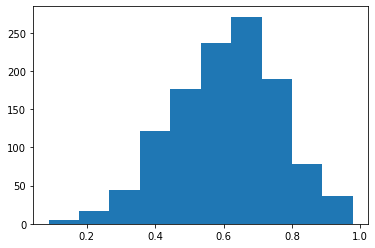

In [3]:
plt.hist(segment_podataka.danceability)

Добили смо график, хистограм, који личи на стубичасти дијаграм. И сада видимо стубиће различите висине и они нам говоре о заступљености песама одређене карактеристике. Међутим, код стубичастих дијаграма на х оси, тј. сваком стубићу одговарала је тачно једна категорија (на пример, стубић је одговарао свим песмама издатим у једној години), док овде, код хистограма, стубић одговара интервалу вредности - висином стубића представљен је броју песама чија је вредност плесозовности у неком интервалу а сам интервал обележен је ширином стубића на х оси. Додатно, код стубичастих дијаграма (које цртамо на пример `bar` функцијом) пре цртања дијаграма ми пребројимо податке и функцији прослеђујемо листу висина стубића, док `hist` функција врши и бројање и цртање (те можете ако желите да сачувате и резултате бројања у нову променљиву ако хоћете нешто даље да радите са тим бројевима - део тих бројева видите горе изнад графика).

Нацртајмо поново овај хистограм, али користећи још опција да график постане информативнији:

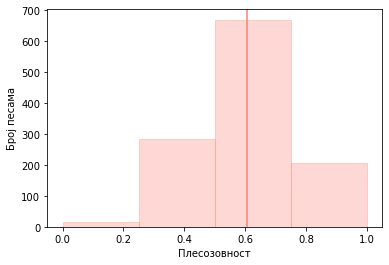

In [4]:
plt.hist(segment_podataka.danceability, # podaci nad kojima primenjujemo funkciju hist
         bins=[0,0.25,0.5,0.75,1], # pozicije intervala u kojima prebrojavamo pesme, ovde date kao lista od 5 elemenata koje su granice 4 intervala
         alpha=0.3, # transparentnost
         color='salmon',
         edgecolor='salmon') # boja ivica stubica
meanval = np.mean(segment_podataka.danceability) # prosecna vrednost podataka nacrtanih histogramom
plt.axvline(x=meanval,color='salmon') # dodajemo prosecnu vrednost kao uspravnu liniju sa x koordinatom koja odgovara prosecnoj vrednosti
plt.xlabel('Плесозовност')
plt.ylabel('Број песама')
plt.show()

На овом хистограму смо променили боје (аргументима функције `color` за боју стубића, `edgecolor` за боју ивица и `alpha` за прозирност) и имена на осама које смо користили и раније. Међутим, променио се и број стубића чиме видимо да се по облику овај и претходни дијаграм разликују, иако смо цртали исте податке. То је зато што основна верзија функције коју смо прво искористили врши пребројавање песама тако што могући опсег података (од минималне до максималне вредности) подели у 10 једнаких интервала и затим преброји колико песама је у ком од интервала (на пример, колико је песама са плесозовношћу од 0 до 0.1, затим од 0.1 до 0.2 и тако даље). Зависно од тога у колико интервала делимо простор могућих вредности, дијаграм ће изгледати више или мање детаљно и то контролишемо аргументом `bins`. Oвај аргумент варирамо или тако што му додељујемо број интервала (нпр. `bins=20` чиме се подаци деле у 20 једнаких интервала од најмање до највеће вредности у подацима) или тако што дефинишемо границе интервала (нпр. `bins=[0,0.25,0.5,0.75,1]` ће бројати песме у четири интервала од 0 до 0.25, од 0.25 до 0.5, од 0.5 до 0.75 и од 0.75 до 1). 

Када хоћемо да задамо неки број интервала од одабране најмање до највеће вредности, за то можемо користити функцију `linspace` библиотеке `numpy`:

In [5]:
np.linspace(0,1,11) # za na primer granice 10 intervala od 0 do 1 pozivamo linspace funkciju zajtevajuci 11 brojeva od 0 do 1

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Следећи код служи да креира интерактивни приказ хистограма на коме можете уз помоћ клизача мењати број интервала за хистограм, а из падајућег менија можете одабрати музичку карактеристику чији хистограм желите да прикажете, не обазирите се пуно на код већ се играјте са вредностима и испитајте колико се разликују хистограми за различити број интервала, а затим и колико су другачији хистограми другачијих музичких карактеристика попут инструменталности, акустичности, гласности и других.

In [6]:
# ovaj kod sluzi da kreira interaktivnu verziju histograma na kojoj mozete menjati muzicku karakteristiku i broj intervala

from ipywidgets import interactive # ukljucivanje interaktivnog modula


def plot_hist(broj_intervala,muzicka_karakteristika,zanr, muzicka_dekada): # funkcija kojom crtamo histogram za zadate parametre
    data_segment = podaci[(podaci.genre==zanr)&(podaci.muzicka_dekada==muzicka_dekada)] #selektujemo pop pesme 2010ih
    plt.hist(data_segment[muzicka_karakteristika], # podaci nad kojima primenjujemo funkciju hist
             bins=np.linspace(0,1,broj_intervala+1), # pozicije intervala u kojima prebrojavamo pesme, ovde date kao 20 intervala jednake duzine
             alpha=0.5) # transparentnost
    meanval = np.mean(data_segment[muzicka_karakteristika]) # prosecna vrednost podataka nacrtanih histogramom
    plt.axvline(x=meanval)
    stdval = np.std(data_segment[muzicka_karakteristika]) # standardna devijacija 
    plt.axvline(x=meanval+stdval,ls='--') # uspravna linija na datoj x poziciji
    plt.axvline(x=meanval-stdval,ls='--')    
    muz_cirilicom = {'acousticness':'Акустичност','instrumentalness':'Инструменталност',
                 'danceability':'Плесозовност','loudness':'Гласност','valence':'Позитивност',
                 'energy':'Енергичност'}
    
    plt.xlabel(muz_cirilicom[muzicka_karakteristika])
    plt.ylabel('Број песама')
    plt.show()


interactive_plot = interactive(plot_hist, broj_intervala=(2,40,2),muzicka_karakteristika = ['danceability','energy','valence','loudness','acousticness','instrumentalness'],zanr='pop',muzicka_dekada='2010s')
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=20, description='broj_intervala', max=40, min=2, step=2), Dropdown(descr…

Поред броја песама у сваком од интервала плесозовности, тј. хистограма, претходни графици садрже и додатну усправну линију која означава просечну вредност коју смо до сада користили (пуна усправна линија). 

Са малим бројем сегмената добијемо неку грубу структуру, нпр да је више песама код којих је плесозовност између 0.5 и 0.75 (ако користите само 4 интервала), док са повећањем добијате све детаљније информације. Израчуната просечна вредност наравно не зависи од овог избора и она се стално налази на истом месту, али са финијом структуом (више интервала) боље можете уочити број песама који се налази у истом интервалу или у непосредној околини просечне вредности.

Ако на претходном графику задржите неки број интервала са чијим нивоом детаљности сте задовољни и промените музичку карактеристику која се приказује на графику можете видети и пар других примера података представљеним хистограмима и њихових просечних вредности.

<details>    
<summary>
    <font color="darkgreen"><b>Шта је све другачије на хистограму акустичности или гласности у односу на претходно разматрану плесозовност?</b></font>
</summary>
Хистограм није више симетрична слика (у односу на вертикалу). Ако погледамо гласност, та асиметрија је блажа, док је у случају акустичности то драстичније. Ширина дијаграма се мења - у случају гласности готово да не постоје вредности испод 0.4 а и генерално су сконцентираније око просечне вредности, док у случају акустичности постоје песме са свим могућим вредностима акустичности иако су неке далеко популарније од других.
Коначно, просечна вредност у случају акустичности није више тако близу вредности која је и најпопуларнија у подацима.


Математички појам који описује оно што приказујемо хистограмима зове се **расподела** или **дистрибуција** и као што име каже, говори нам о томе како су подаци расподељени у простору могућих вредности. Наш циљ у анализи података је често да сазнамо што је више могуће о расподели података, али зависно од тога колико нам је података доступно наше сазнање је ограничено. То нам делимично илуструје разлика у томе како нам се чини да расподела изгледа зависно од тога колико детаљне бинове бирамо у хистограму - ако их одаберемо премало сазнајемо јако мало о томе како су подаци расподељени, док превише интервала производи график који је можда превише скоковит што такође вероватно не одговара реалности већ пре може бити последица неких насумичности у подацима. Када сакупљамо податке или мерењима или испитивањем кроз анкете, ови интервали су често дефинисани за нас коришћеним мерним инструментом. У случају мерења физичких величина, најмањи могући интервал дефинисан је прецизношћу коришћеног мерног инструмента, нпр. када меримо температуру термометром коме је најмањи могући подеок 1 степен целзијуса, ми не можемо имати интервале који имају мању ширину од тог једног степена. Слично, често када анкетама питамо људе о њиховим платама, не питамо их да нам дају тачан износ у динар (када би ширина најмањег могућег интервала била 1 динар) већ им обично понудимо интервале вредности, тако да већ прикупљањем одговора на анкету ми радимо на припреми хистограма.

Најчешће немамо довољно података да сазнамо детаљан облик расподеле, али имамо начине да квантификујемо неке од особина које смо препознали као различите поредећи хистограме других података. На пример, за ширину расподеле најчешће користимо **стандардну девијацију**. Расподеле са већом стандардном девијацијом су шире од оних које имају мању стандардну девијацију, испрекиданим усправним линијама на претходним графицима смо обележили вредност која је једну стандардну девијацију већа и мања од просечне вредности, те можете оценити колико података се у различитим случајевима налази у овом опсегу. Више о дистрибуцијама, просечним вредностима и стандардној девијацији прочитајте у речнику статистичких појмова на крају овог курса.

За симетричне расподеле за које можемо очекивати да су довољно близу **нормалној расподели** очекујемо да се око 2/3 података налази у околини просечне вредности, можемо проверити како стоје ствари код наших података за различите карактеристике музике:

In [7]:
meanval = np.mean(segment_podataka.danceability) # prosecna vrednost podataka nacrtanih histogramom
stdval = np.std(segment_podataka.danceability) # standardna devijacija 
uslov = (segment_podataka.danceability<=meanval+stdval)&(segment_podataka.danceability>=meanval-stdval)# ovim uslovom biramo podatke koji su manje od jedne standardne devijacije daleko od prosecne vrednosti
round(100*len(segment_podataka[uslov])/len(segment_podataka),2) # racunamo procenat podataka koji se nalaze najvise jednu standardnu devijaciju daleko od prosecne vrednosti

67.23

Видимо да се преко 67% поп песама 2010их налазе у околини просечне песме на највећој удаљености од једне стандардне девијације. 
<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left"/> Испитајте на исти начин како се овај проценат мења за акустичност или гласност. На основу претходних графикона, да ли већ имате нека очекивања да ли ће воај број бити већи или мањи?</div> 

In [8]:
# #resenje

# meanval = np.mean(segment_podataka.loudness) # prosecna vrednost podataka nacrtanih histogramom
# stdval = np.std(segment_podataka.loudness) # standardna devijacija 
# uslov = (segment_podataka.loudness<=meanval+stdval)&(segment_podataka.loudness>=meanval-stdval)# ovim uslovom biramo podatke koji su manje od jedne standardne devijacije daleko od prosecne vrednosti
# round(100*len(segment_podataka[uslov])/len(segment_podataka),2) # racunamo procenat podataka koji se nalaze najvise jednu standardnu devijaciju daleko od prosecne vrednosti

Користећи `seaborn` библиотеку можемо лако видети расподеле по одабраној колони за више различитих жанрова или више различитих декада користећи [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) функцију, ево примера како се расподела плесозовности у последњој деценији разликује по жанровима:

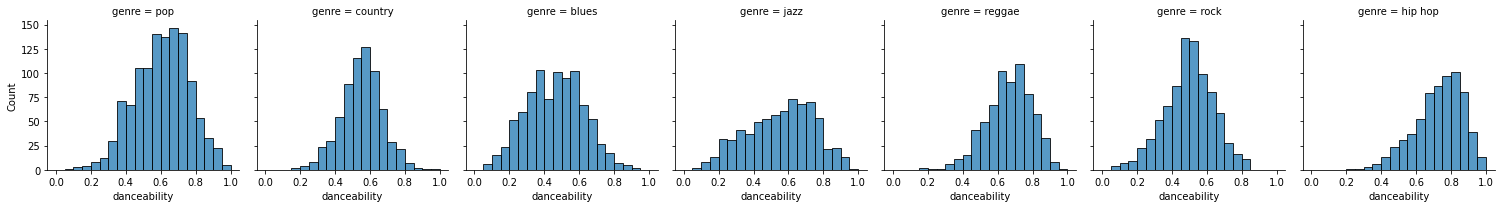

In [9]:
g = sns.FacetGrid(podaci[podaci.muzicka_dekada=='2010s'], col="genre")
g.map_dataframe(sns.histplot, x="danceability",bins=np.linspace(0,1,21))
plt.show()

Овако лако и са мало линија кода (мада јесмо оставили основне боје и нисмо исправљали имена на осама), можемо видети како се плесозовност разликује по жанровима. У неким жанровима расподела је ужа (нпр. кантри), а негде је шира (нпр. џез), што можемо проверити и ако израчунамо стандардне девијације ових расподела:

In [10]:
muzika2010ih = podaci[podaci.muzicka_dekada=='2010s'] # izdavajamo muziku 2010ih
muzika2010ih.groupby('genre').danceability.std() # grupisemo muziku 2010ih po zanrovima i na koloni danceability racunamo standardnu devijaciju

genre
blues      0.161867
country    0.117380
hip hop    0.137096
jazz       0.192326
pop        0.154585
reggae     0.129584
rock       0.140634
Name: danceability, dtype: float64

Видимо да су израчунате вредности стандардних девијација су у складу са нашом визуелном оценом, џез дистрибуција као најшира има и највећу вредност стандардне девијације.

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left"/> Нацртајте хистограме гласности музике по жанровима (за музичку декаду по избору) и израчунајте стандардне девијације тих дистрибуција.</div> 

In [11]:
# #resenje
# g = sns.FacetGrid(podaci[podaci.muzicka_dekada=='2010s'], col="genre")
# g.map_dataframe(sns.histplot, x="loudness",bins=np.linspace(0,1,21))
# plt.show()
# muzika2010ih = podaci[podaci.muzicka_dekada=='2010s'] # izdavajamo muziku 2010ih
# print(muzika2010ih.groupby('genre').loudness.std()) # grupisemo muziku 2010ih po zanrovima i na koloni loudness racunamo standardnu devijaciju

Исту функцију можемо икористити да погледамо и како се акустичност у џез музици мењала током деценија:

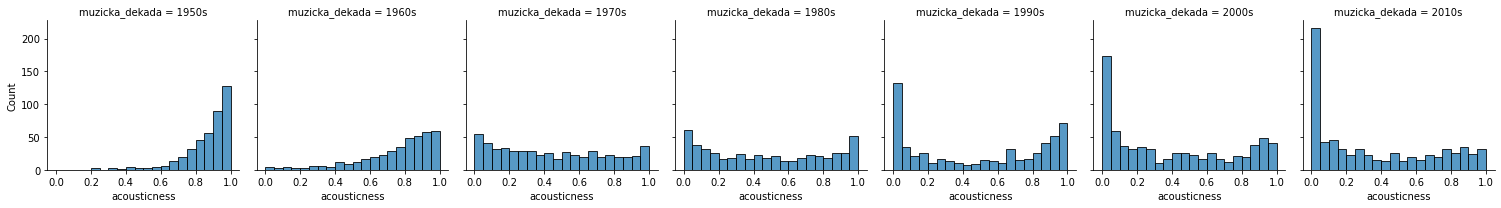

In [12]:
g = sns.FacetGrid(podaci[podaci.genre=='jazz'], col="muzicka_dekada")
g.map_dataframe(sns.histplot, x="acousticness",bins=np.linspace(0,1,21))
plt.show()

Ове дистрибуције су још занимљивије - не само да нису више симетричне као дистрибуције плесозовности, већ видимо да се облик дистрибуције драстично мењао кроз време. У педесетим годинама прошлог века, најпопуларнија вредност акустичности била је близу максималне вредности од 0.1, док у последњим декадама видимо да су најпопуларније вредности близу 0, тј. електрична музика присутна је и у џез музици. 

Код расподела које су асиметричне попут ових расподела акустичности најчешћа вредност (која се такође зове и мод или модус) у скупу података није близу просечне (видите то на графику испод) и тада је згодно поред ове две вредности наводити и **медијалну** вредност која је тачно на половини, тј. половина података је мања од ње, а половина је већа, видите то на следећем примеру (означено усправном испрекиданом линијом):

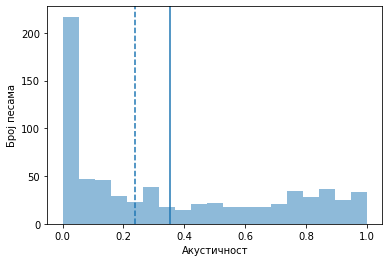

In [13]:
data_segment = podaci[(podaci.genre=='jazz')&(podaci.muzicka_dekada=='2010s')] #selektujemo pop pesme 2010ih
plt.hist(data_segment.acousticness, # podaci nad kojima primenjujemo funkciju hist
         bins=np.linspace(0,1,20), # pozicije intervala u kojima prebrojavamo pesme, ovde date kao 20 intervala jednake duzine
         alpha=0.5) # transparentnost
meanval = np.mean(data_segment.acousticness) # prosecna vrednost podataka nacrtanih histogramom
plt.axvline(x=meanval) # dodavanje uspravne linije na poziciji prosecne vrednosti
medianval = np.median(data_segment.acousticness) # medijalna vrednost podataka nacrtanih histogramom
plt.axvline(x=medianval,ls='--') # dodavanje uspravne linije na poziciji medijalne vrednosti
plt.xlabel('Акустичност')
plt.ylabel('Број песама')
plt.show()

Коначно, велики број савремених алата на основу доступних података покушава да процени како изгледа математичка расподела која најбоље описује доступне податке:

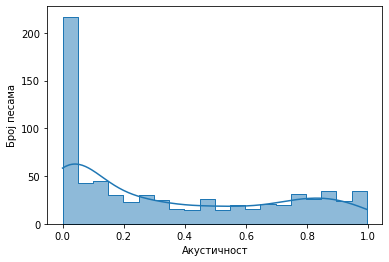

In [14]:
sns.histplot(data=podaci[(podaci.genre=='jazz')&(podaci.muzicka_dekada=='2010s')], x="acousticness",bins=20, kde=True, element="step")
plt.xlabel('Акустичност')
plt.ylabel('Број песама')
plt.show()

Иако су глатке верзије расподела често лепше и стога популарније коришћене и у научним радовима и у популарној комуникацији података, треба са њима увек бити опрезан пошто су настале као апроксимација података. Те апроксимације често се ослањају на неке претпоставке о подацима (врло често да су подаци добро описани једном или са више нормалних расподела) и стога је опрезније погледати колико се глатка расподела и дискретна расподела коју креира хистограм разликују (попут слике изнад) и на основу тога просудити да ли је визуализација одговарајућа. Процену да ли је нешто одговарајућа апроксимација или не увежбаћете са великим бројем погледаних графика, али угрубо, желите да ваша приближна глатка дистрибуција одговара подациам, овде на пример, ова крива значајно лошије оцењује вредности које су близу 0, тако да овде ова крива није одговарајућа. Када су вредности ваших података у ограниченом интервалу (као овде између 0 и 1), ове глатке апроксцимације често не раде како треба и понудиће вам процењене вредности и изван граница могућег, на то посебно обратите пажњу. 

**Просек: пре употребе погледати!**

Кључна порука ове лекције је да када користите просек да сажмете неку велику групу података у пар бројева, погледате дистрибуцију података и уверите се да је просек заиста меродаван. У случају дистрибуција каква је нпр. расподела плесозовност поп музике последње музичке декаде, дистрибуција је само благо асиметрична, па се просечна вредност налази у околини медијалне, а и у околини најпопуларније вредности. У таквим ситуацијама, просечна вредност наравно умањује број информација у односу на целу дистрибуцију, али се пуно песама налази у непосредној околини ове вредности, те комуницирате неку битну и заступљену вредност међу вашим подацима. Ово је још израженије код дистрибуције гласности истог музичког жанра, која иако јесте још више асиметрична је изузетно уска дистрибуција (мала стандардна девијација) па је велики број података (преко 80%) једну стандардну девијацију удаљен од просечне вредности.

Са друге стране, ако ваши подаци изгледају као дистрибуције акустичности, потребно је да размотрите алтернативе и уместо просечне вредности комуницирате најпопуларију вредност (мод) или бар вредност која је тачно на половини (медијана). То је стога што је просек доста удаљенији од најпопуларнијих вредности (видите акустичност џеза 2010их) и у његовој околини нема пуно песама. Ово је обично сигнализирано и великим вредностима стандардних дистрибуција, па вам преглед и тих вредности може помоћи да закључите да је дистрибуција доста широка и да је њено свођење на један број (просек) неадекватно. Предност медијалне вредности код оваквих дистрибуција је посебно очигледна када подаци нису ограничени на интервал од 0 до 1 као овде, већ се појављују неке изузетно велике вредности које могу подизати просечну вредност, али неће значајно мењати медијалну. Ову особину има дистрибуција зарада код које је готово увек смисленије причати о медијалној него о просечној вредности.

Коначно, има дистрибуција попут нпр. акустичности у џез музици током деведесетих које имају два популарна региона - има пуно података и са врло високом и врло ниском акустичношћу. Те дистрибуције се зову бимодалне (два мода) код њих су често медијална и просечна вредност на блиске, али су обе недовољно информативне пошто су обе доста удаљене од популарних вредности. У тим случајевима је информативније навести модове, или са великом вредношћу стандардне девијације сигнализирати да је дистрибуција широка и да се не обраћа пуно пажње на просек.

Сада када смо се упознали са расподелама и једном од мера њихове ширине, можемо поново погледати како изгледају линијски дијаграми које креира функција `lineplot` библиотеке `seaborn`, овај пут користећи аргумент `ci` - интервал поверења (енг. confidence interval). Прослеђивањем вредности `sd` овом аргументу, сигнализирамо функцији да свуда око линије која је просечна вредност обележи област у којој су подаци који су једну стандардну девијацију удаљени од просека:

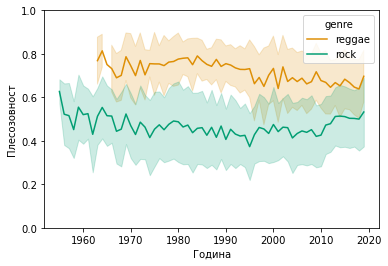

In [15]:
rock_reggae = podaci[(podaci.genre=='reggae')|(podaci.genre=='rock')] # izdvajamo samo dva muzicka zanra zarad lakseg pracenja grafika
sns.lineplot(data = rock_reggae, # izbor podataka koje crtamo
             x = 'release_date',y='danceability', # izbor kolona koje se nalaze na x i y osi
             hue='genre', # biramo da linije budu obojene po zanrovima
             palette=sns.color_palette("colorblind")[1:3], # definisemo boje, u ovom slucaju 2. i 3. boju iz palete prikazane u nastavku
             ci='sd') # ovim parametrom definisemo da se na grafiku pojave samo izracunate prosecne vrednosti, vise o tome u nastavku
plt.ylim([0,1])
plt.ylabel('Плесозовност')
plt.xlabel('Година')
plt.show()


Сетите се, овај график смо приказали на крају друге лекције, и чинило нам се тада да су рок и реге значнајно другачији током целог временског интервала у коме посматрамо музику (тада смо приказали само просечне вредности). Сада са осенченим регионима којима комуницирамо и ширину расподела, односно угрубо комуницирамо у ком опсегу вредности се налази највише песама за дату годину, видимо да су разлике међу жанровима мање, често два обојена региона или додирују или поклапају. Специјално у последњим годинама, видимо да је просечна вредност једног жанра у оквиру региона другог жанра, односно пуно песама има карактеристике које по карактеристикама личе и на просечне песме једног и другог жанра. Са друге стране током осамдесетих година два жанра су далеко више раздвојена и тада са већом сигурношћу можемо говорити о дистинкцијама међу њима. Ова сличност и разлика међу подацима коју за сада оцењујемо само преклапањем између типичних региона параметара, формално се оцењује кроз статистичке тестове и више о тој теми можете прочитати у речнику појмова на крају и у оквиру темата о екологији.

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left"/> Како смо приметили да се само приказивањем промена просечних вредности можемо заварати и лоше проценити значајност промена у оквиру неког жанра, ова визуализација може бити интересантан начин да искомуницирате промене у ширини и облику дистрибуција које су се мењале кроз време:</div> 

<img src="muzika slike/bluz_energicnost.png"
     alt="Markdown Monster icon"
     width='400' />
На овој слици видимо да је енергичност блуз музике расла (дистрибуција се полако кроз деценије померала све више у десно), али и да је током деведесетих у блуз музици било песама свих нивоа енергичности практично једнако заступљених.  
Покушајте да је репродукујете користећи пример кода који се налази на [овој адреси](https://seaborn.pydata.org/examples/kde_ridgeplot.html).

<div class="alert alert-block alert-info"><img src="muzika slike/zad.png" align="left"/> У претходној лекцији смо направили функцију која рачуна и црта померајући просек музичке карактеристике по избору, ваш задатак је да прилагодити ту функцију тако да поред просечне вредности црта и интервал поверења од једне стандардне девијације (као што то ради функција `lineplot` изнад. За то ће вам од користи бити ова функција fill_between:https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html</div> 

In [16]:
# #resenje

# def grafik_pokretnog_proseka(podaci, zanr, muz_karakteristika, vremenski_interval, boja):
#     """
#     Ova funkcija za odabrani zanr i muzicku karakteristiku crta grafik promene karakteristike kroz vreme
#     ali se usrednjavanje ne vrsi na godisnjem vec na visegodisnjem nivou (definisano parametrom vremenski_interval).
    
#     podaci - skup podataka koji sadrzi pesme razlicitih zanrova i za svaku ima vrednosti muzickih karakteristika (akusticnost, glasnost,itd.)
#     zanr - string koji oznacava muzicki zanr koji hocemo da selektujemo - moze biti 'pop', 'rock' itd
#     muz_karakteristika - string koji oznacava karakteristiku koju usrednjavamo i crtamo, mora da odgovara imenu kolone u tabeli podaci(moze biti 'acousticness', 'danceability'...)
#     vremenski_interval je broj godina (int), za 1 radi isto sto i groupby('release_date').mean(), za 10 crta desetogodisnji prosek
#     boja - string sa imenom boje (npr.'grey') ili heks kodom ('#000000') kojom crtamo liniju izracunatog proseka
#     """

#     zanr_cirilicom = {'pop':'поп','country':'кантри','blues':'блуз','jazz':'џез','reggae':'реге','rock':'рок','hip hop':'хип хоп'}
#     muz_cirilicom = {'acousticness':'Акустичност','instrumentalness':'Инструменталност',
#                      'danceability':'Плесозовност','loudness':'Гласност','valence':'Позитивност',
#                      'energy':'Енергичност'}
    
#     podaci_podskup = podaci[podaci.genre==zanr][['release_date',muz_karakteristika]] # deo skupa podataka koji odgovoara odabranom zanru i muzickoj karakteristici
    
#     prva_godina = min(podaci_podskup.release_date)+vremenski_interval-1 # prva godina za koju mozemo da sracunamo petogodisnji prosek, mora biti bar 5 godina veca od prve godine koju imamo u podaciam
#     poslednja_godina = max(podaci_podskup.release_date) # poslednja godina je najveca vrednost podataka o godinama u podacima

#     vreme = [t for t in range(prva_godina,poslednja_godina+1)] # lista godina od min za koju cemo sracunati prosek do maksimalne za zanr koji posmatramo
#     prosek = [] # lista u kojoj cemo sacuvati prosecne podatke u toku odabranog vremenskog intervala
#     stdevs = [] # lista u kojoj cemo sacuvati standardne devijacije
#     for t in vreme: # za svaku godinu iz liste
#         uslov = ((podaci_podskup.release_date)>=t-vremenski_interval)&((podaci_podskup.release_date)<t)
#         podskup_t = podaci_podskup[uslov][muz_karakteristika] # izdvajamo deo podataka koji odgovara prethodnim godinama u okviru posmatranog prozora
#         prosek.append(podskup_t.mean()) # racunamo prosek i dodajemo u listu
#         stdevs.append(podskup_t.std()) # dodajemo standardne devijacije
#     plt.plot(vreme, prosek,color=boja,label=zanr_cirilicom[zanr]+', '+str(vremenski_interval)+'-годишњи просек') # crtamo grafik
#     prosek = np.array(prosek) # pretvaramo listu u numpy niz da bismo lakse sabirali i oduzimali vrednosti duz svih elemenata niza
#     stdevs = np.array(stdevs)
#     plt.fill_between(vreme, prosek-stdevs,prosek+stdevs,color=boja,alpha=0.2) # crtamo grafik u kome je osencen region udaljen jednu standardnu devijaciju od proseka
#     plt.xlabel('Година')
#     plt.ylabel(muz_cirilicom[muz_karakteristika].capitalize())
#     #return time,mean_feature # alternativno, ova funkcija bi mogla da vraca sracunate vrednosti a da na drugom mestu crtamo grafik

In [17]:
# # resenje
# grafik_pokretnog_proseka(podaci,'pop','loudness',5,'grey')